# Secondary Structure Graphs & Chain Graphs
In this tutorial, we'll be looking at higher-order graphs - that is graphs of Secondary Structure Elements and interacting chains (quaternary structure) - as well as assorted visualisation tools.

Graphein provides utilities for computing these graphs from residue-level graphs. I'd recommend checking out [this tutorial]() for more information.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/a-r-j/graphein/blob/master/notebooks/higher_order_graphs.ipynb)


First, we'll construct a graph to work with



In [1]:
# Install Graphein if necessary
# !pip install graphein

# Install DSSP if necessary
# !sudo apt-get install dssp (better for colab) OR !conda install -c salilab dssp

In [2]:
import logging
import networkx as nx
import matplotlib.pyplot as plt
logging.getLogger("matplotlib").setLevel(logging.WARNING)
logging.getLogger("graphein").setLevel(logging.INFO)

import graphein.protein as gp

new_funcs = {"keep_hets": False,
             "edge_construction_functions": [gp.add_peptide_bonds,
                                              gp.add_hydrogen_bond_interactions,
                                              gp.add_disulfide_interactions,
                                              gp.add_ionic_interactions,
                                              gp.add_aromatic_interactions,
                                              gp.add_aromatic_sulphur_interactions,
                                              gp.add_cation_pi_interactions],
             "dssp_config": gp.DSSPConfig()
            }
config = gp.ProteinGraphConfig(**new_funcs)
g = gp.construct_graph(config=config, pdb_code='4hhb')
gp.plotly_protein_structure_graph(g, node_size_multiplier=1)

Reading PDB file...         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Processing PDB dataframe... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Initializing graph...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--

In [31]:
np.where(nx.to_numpy_matrix(g), g.graph["dist_mat"], 0).shape

(3526, 3526)

## Secondary Structure Graphs
We use [DSSP] to compute secondary structures. This is stored under `d["ss"]` in the node attributes. Eg:

In [3]:
g = gp.secondary_structure(g)
for n, d in g.nodes(data=True):
    print(d["ss"])
    if d["ss"] == "T":
        break

-
-
-
H
H
H
H
H
H
H
H
H
H
H
H
H
H
T


We can compute either a multigraph, where each edge in the selection is preserved (e.g. multiple edges between nodes ``H1`` and ``H2`` are permitted), or a weighted graph where we aggregate multiple edges between a pair of nodes into and preserve the edge information as metadata.

### MultiGraph

In [4]:
ss_graph = gp.compute_secondary_structure_graph(g, remove_self_loops=True)
print(nx.info(ss_graph))

for u, v, d in g.edges(data=True):
    print(u, v, d)

MultiGraph named '4hhb' with 80 nodes and 107 edges
A:VAL:1 A:LEU:2 {'kind': {'peptide_bond'}}
A:LEU:2 A:SER:3 {'kind': {'peptide_bond'}}
A:SER:3 A:PRO:4 {'kind': {'peptide_bond'}}
A:SER:3 A:ASP:6 {'kind': {'hbond'}}
A:PRO:4 A:ALA:5 {'kind': {'peptide_bond'}}
A:ALA:5 A:ASP:6 {'kind': {'peptide_bond'}}
A:ASP:6 A:LYS:7 {'kind': {'ionic', 'peptide_bond'}}
A:ASP:6 A:LYS:127 {'kind': {'hbond', 'ionic'}}
A:ASP:6 A:SER:124 {'kind': {'hbond'}}
A:ASP:6 C:ARG:141 {'kind': {'ionic'}}
A:LYS:7 A:THR:8 {'kind': {'peptide_bond'}}
A:LYS:7 A:ASP:74 {'kind': {'hbond', 'ionic'}}
A:THR:8 A:ASN:9 {'kind': {'peptide_bond'}}
A:ASN:9 A:VAL:10 {'kind': {'peptide_bond'}}
A:VAL:10 A:LYS:11 {'kind': {'peptide_bond'}}
A:LYS:11 A:ALA:12 {'kind': {'peptide_bond'}}
A:LYS:11 A:ASP:74 {'kind': {'ionic'}}
A:ALA:12 A:ALA:13 {'kind': {'peptide_bond'}}
A:ALA:13 A:TRP:14 {'kind': {'peptide_bond'}}
A:TRP:14 A:GLY:15 {'kind': {'peptide_bond'}}
A:GLY:15 A:LYS:16 {'kind': {'peptide_bond'}}
A:LYS:16 A:VAL:17 {'kind': {'peptide_b

/tmp/ipykernel_473477/3519097318.py:2: DeprecationWarning:

info is deprecated and will be removed in version 3.0.




/home/atj39/github/graphein/graphein/protein/visualisation.py:901: FutureWarning:

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.

/home/atj39/anaconda3/envs/graphein/lib/python3.8/site-packages/mpl_chord_diagram/utilities.py:11: RuntimeWarning:

invalid value encountered in true_divide



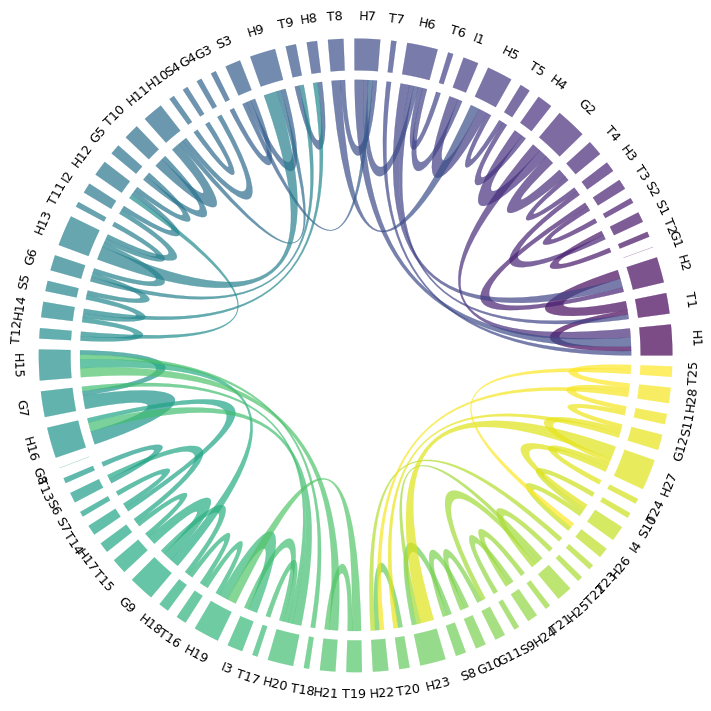

In [5]:
plt.rcParams["figure.figsize"] = (10, 10)
gp.plot_chord_diagram(ss_graph)

In [6]:
ss_graph = gp.compute_secondary_structure_graph(g, remove_self_loops=True, return_weighted_graph=True)
print(nx.info(ss_graph))
for u, v, d in ss_graph.edges(data=True):
    print(u, v, d)

Graph named '4hhb' with 80 nodes and 86 edges
H1 H7 {'weight': 3, 'kind': {'hbond', 'ionic'}, 'hbond': 2, 'ionic': 1}
H1 G2 {'weight': 3, 'kind': {'hbond', 'ionic'}, 'hbond': 1, 'ionic': 2}
H1 T7 {'weight': 1, 'kind': {'ionic'}, 'ionic': 1}
H1 T1 {'weight': 1, 'kind': {'peptide_bond'}, 'peptide_bond': 1}
T1 H2 {'weight': 2, 'kind': {'ionic', 'peptide_bond'}, 'peptide_bond': 1, 'ionic': 1}
T1 H6 {'weight': 1, 'kind': {'aromatic'}, 'aromatic': 1}
H2 H6 {'weight': 2, 'kind': {'ionic'}, 'ionic': 2}
H2 T3 {'weight': 1, 'kind': {'ionic'}, 'ionic': 1}
T2 S1 {'weight': 2, 'kind': {'aromatic', 'peptide_bond'}, 'aromatic': 1, 'peptide_bond': 1}
S1 H3 {'weight': 1, 'kind': {'aromatic'}, 'aromatic': 1}
S2 T3 {'weight': 1, 'kind': {'peptide_bond'}, 'peptide_bond': 1}
H3 T4 {'weight': 1, 'kind': {'peptide_bond'}, 'peptide_bond': 1}
T4 G2 {'weight': 2, 'kind': {'ionic', 'peptide_bond'}, 'peptide_bond': 1, 'ionic': 1}
G2 H4 {'weight': 2, 'kind': {'hbond', 'peptide_bond'}, 'peptide_bond': 1, 'hbond': 1

/tmp/ipykernel_473477/526239525.py:2: DeprecationWarning:

info is deprecated and will be removed in version 3.0.




## Chain Graph
Chain graphs represent the quaternary structure of a protein complex; nodes represent individual chains and edges are the interactions between them. Again, we can compute either a multigraph or a weighted graphs.

### Multigraph

Reading PDB file...         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Processing PDB dataframe... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Initializing graph...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Constructing edges...       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--

/tmp/ipykernel_473477/2217966561.py:4: FutureWarning:

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.



A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'hbond', 'ionic'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'ionic'}}
A A {'kind': {'ionic', 'peptide_bond'}}
A A {'kind': {'peptide_bond'}}
A A {'kind': {'peptide_bond'}}


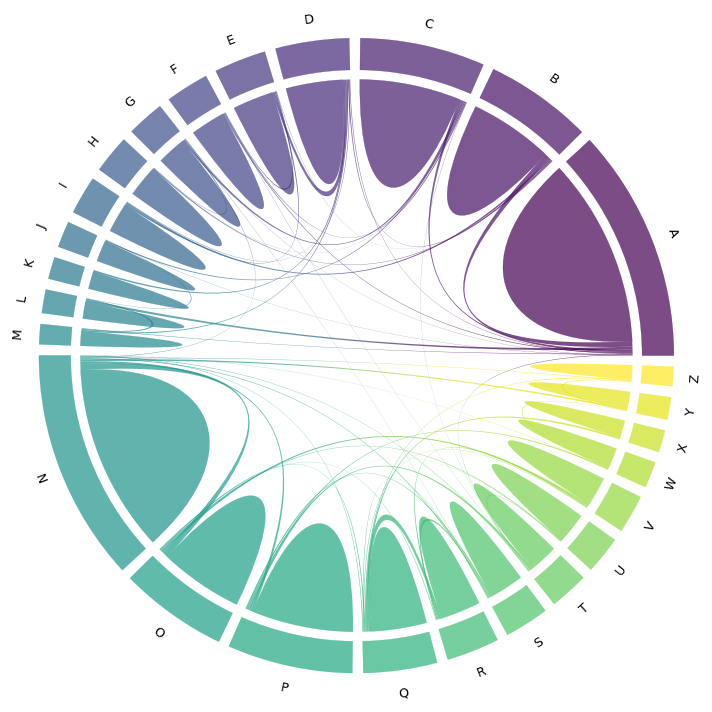

In [7]:
g = gp.construct_graph(config=config, pdb_code='2y69')
chain_graph = gp.compute_chain_graph(g, remove_self_loops=False, return_weighted_graph=False)

mat = nx.adjacency_matrix(chain_graph)
a = gp.visualisation.chord_diagram(mat, names=list(chain_graph.nodes), use_gradient=True)

for i, (u, v, d) in enumerate(chain_graph.edges(data=True)):
    print(u, v, d)
    if i == 15:
        break

### Weighted Graph

/var/folders/p1/0qtk6t_520n7k4bvk1p26l_w0000gn/T/ipykernel_24561/2703279768.py:3: FutureWarning:

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.



A A {'weight': 590, 'kind': {'hbond', 'ionic', 'aromatic', 'peptide_bond'}, 'hbond': 12, 'ionic': 19, 'aromatic': 47, 'peptide_bond': 512}
A L {'weight': 9, 'kind': {'ionic', 'aromatic'}, 'ionic': 4, 'aromatic': 5}
A J {'weight': 1, 'kind': {'aromatic'}, 'aromatic': 1}
A B {'weight': 19, 'kind': {'hbond', 'ionic', 'aromatic'}, 'hbond': 5, 'ionic': 11, 'aromatic': 3}
A C {'weight': 9, 'kind': {'ionic', 'aromatic'}, 'ionic': 5, 'aromatic': 4}
A T {'weight': 3, 'kind': {'hbond', 'aromatic'}, 'hbond': 1, 'aromatic': 2}
A G {'weight': 1, 'kind': {'hbond'}, 'hbond': 1}
A D {'weight': 2, 'kind': {'ionic'}, 'ionic': 2}
A M {'weight': 2, 'kind': {'ionic'}, 'ionic': 2}
A F {'weight': 5, 'kind': {'hbond', 'ionic', 'aromatic'}, 'hbond': 2, 'ionic': 1, 'aromatic': 2}
B B {'weight': 260, 'kind': {'hbond', 'ionic', 'aromatic', 'peptide_bond'}, 'hbond': 6, 'ionic': 22, 'aromatic': 6, 'peptide_bond': 226}
B D {'weight': 4, 'kind': {'ionic', 'aromatic'}, 'ionic': 3, 'aromatic': 1}
B I {'weight': 8, 'kin

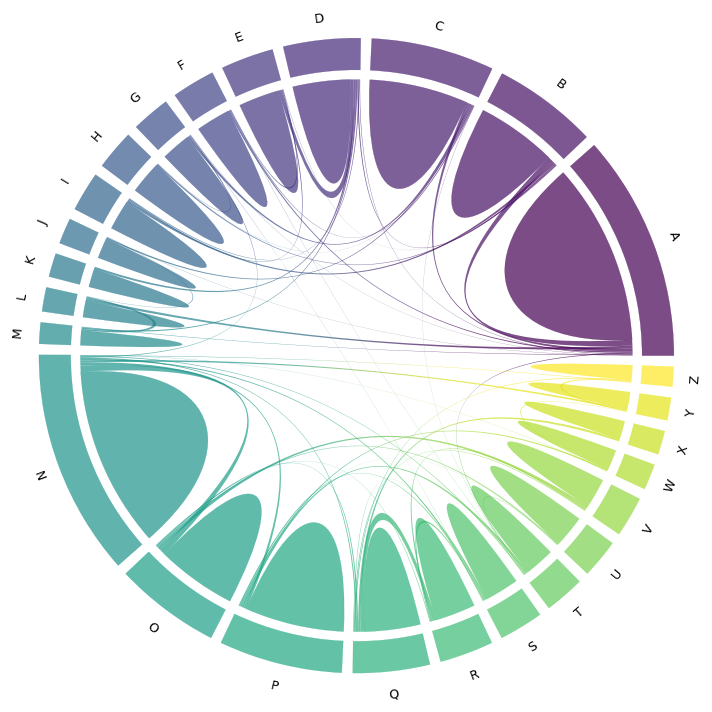

In [42]:
chain_graph = gp.compute_chain_graph(g, remove_self_loops=False, return_weighted_graph=True)

mat = nx.adjacency_matrix(chain_graph)
a = gp.visualisation.chord_diagram(mat, names=list(chain_graph.nodes), use_gradient=True)

for u, v, d in chain_graph.edges(data=True):
    print(u,v, d)